<a href="https://colab.research.google.com/github/ormorteey/BST-222-Survival-Analysis/blob/main/BST_222_Final_Project_%5BExploratory_Data_Analysis%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("pacman")
library(pacman)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:

# freq function

freq = function(var, name = deparse(substitute(var))){
tbl = table( var)
freq_tbl = tbl %>% as.data.frame()
prop_tbl = as.data.frame(prop.table(tbl) * 100) %>% as.data.frame() %>% select(Freq) %>% rename( Percentage = Freq)
total = data.frame(var = "Total", Freq = sum(freq_tbl$Freq), Percentage = sum(prop_tbl$`% Freq`))
df = cbind(freq_tbl, prop_tbl)
colnames(total) = colnames(df)
# df = rbind(df,total)
xname = c(name, colnames(df)[2:length(colnames(df))])
colnames(df) = xname
  return(df)
}

# ctable function

ctable_fn = function( x, y  ){

tbl = table( x, y) %>% as.data.frame.matrix()
prop_tbl = prop.table(tbl) 
tbl %<>% cbind(.,Total = rowSums(.)) %>% rbind(.,Total = colSums(.))
prop_tbl %<>% cbind(.,Total = rowSums(.)) %>% rbind(.,Total = colSums(.))
prop_tbl =  (prop_tbl * 100) %>% round(2)
break_point = dim(tbl)[2]
for(i in 1: dim(tbl)[2]){
  tbl[,i] = paste0(tbl[,i], " [ " , prop_tbl[,i],  "% ]" )
}
return(tbl)

}


num_summary = function(df){

  ## provide summary of the numerical variables
res = df %>% 
  select_if(is.numeric) %>% 
  gather(variables, value)%>%
  group_by(variables) %>%
  summarise(Count = n(), Mean = mean(value, na.rm=TRUE), Min = quantile(value, 0, na.rm=TRUE), Q1 = quantile(value, 0.25, na.rm=TRUE), 
  Q2 = quantile(value, 0.5, na.rm=TRUE),  Q3 = quantile(value, 0.75, na.rm=TRUE), Max = quantile(value, 1, na.rm=TRUE),
   Sd = sd(value, na.rm=TRUE), .groups = 'drop') 

return(res)
}


In [3]:
# p_load(tidyverse, KMsurv, survminer, survival)
p_load(tidyverse, KMsurv, survival)

In [4]:

pneumon_desc_vec = c(
"chldage", "Age child had pneumonia, months",
"hospital", "Indicator for hospitalization for pneumonia (1=yes, 0=no)",
"mthage", "Age of the mother, years",
"urban", "Urban environment for mother (1=yes, 0=no)",
"alcohol", "Alcohol use by mother during pregnancy (1=yes, 0=no)",
"smoke", "Cigarette use by mother during pregnancy (1=yes, 0=no)",
"region", "Region of the coutry (1=northeast, 2=north central, 3=south, 4=west)",
"poverty", "Mother at poverty level (1=yes, 0=no)",
"bweight", "Normal birthweight (>5.5 lbs.) (1=yes, 0=no)",
"race", "Race of the mother (1=white, 2=black, 3=other)",
"education", "Education of the mother, years of school",
"nsibs", "Number of siblings of the child",
"wmonth", "Month the child was weaned",
"sfmonth", "Month the child on solid food",
"agepn", "Age child in the hospital for pneumonia, months")

pneumon_desc_df = data.frame(Variable = pneumon_desc_vec[seq(1,length(pneumon_desc_vec), 2)], Properties = pneumon_desc_vec[seq(2,length(pneumon_desc_vec), 2)])
pneumon_desc_df

Variable,Properties
<chr>,<chr>
chldage,"Age child had pneumonia, months"
hospital,"Indicator for hospitalization for pneumonia (1=yes, 0=no)"
mthage,"Age of the mother, years"
urban,"Urban environment for mother (1=yes, 0=no)"
alcohol,"Alcohol use by mother during pregnancy (1=yes, 0=no)"
smoke,"Cigarette use by mother during pregnancy (1=yes, 0=no)"
region,"Region of the coutry (1=northeast, 2=north central, 3=south, 4=west)"
poverty,"Mother at poverty level (1=yes, 0=no)"
bweight,"Normal birthweight (>5.5 lbs.) (1=yes, 0=no)"


## **Q 8.1**

In [8]:
data(pneumon)
pneumon = pneumon
head(pneumon)


,chldage,hospital,mthage,urban,alcohol,smoke,region,poverty,bweight,race,education,nsibs,wmonth,sfmonth,agepn
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,12,0,22,1,0,0,1,1,1,1,10,1,1,1,1
2,12,0,20,1,1,0,1,1,0,1,12,1,2,2,12
3,3,0,24,1,3,0,1,1,0,1,12,2,1,0,3
4,2,0,22,1,2,2,1,1,0,1,9,0,0,0,2
5,4,0,21,1,1,2,1,1,1,1,12,0,0,0,4
6,12,0,20,1,0,0,1,1,0,1,12,0,0,0,12


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



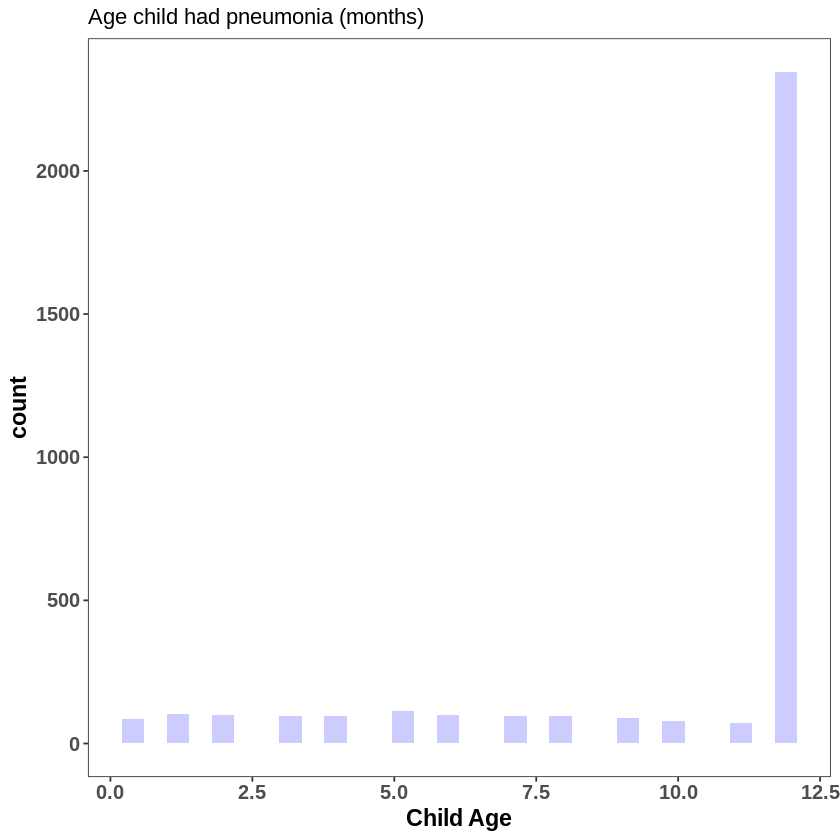

In [10]:
pneumon %>% ggplot(aes(x = chldage)) +
geom_histogram( size = 5, alpha = 0.2, fill = "blue")+
            theme_minimal(base_size = 18)+
            labs(x = "Child Age", title = "Age child had pneumonia (months)") +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))



In [11]:
pneumon$education_cat = cut(pneumon$education, c(0,12, 16, 18, max(pneumon$education)) )
var_to_factor = c("hospital",	"urban"	,"alcohol"	,"smoke",	"region"	,"poverty",	"race",	"education_cat",	"nsibs"	)
pneumon[,var_to_factor] = lapply(pneumon[,var_to_factor], as.factor)

In [12]:
pneumon  %>% select_if(is.factor) %>% map(~with(pneumon,ctable_fn(., pneumon$hospital))) 

,0,1,Total
,<chr>,<chr>,<chr>
0,3397 [ 97.9% ],0 [ 0% ],3397 [ 97.9% ]
1,0 [ 0% ],73 [ 2.1% ],73 [ 2.1% ]
Total,3397 [ 97.9% ],73 [ 2.1% ],3470 [ 100% ]
,0,1,Total
,<chr>,<chr>,<chr>
0,807 [ 23.26% ],24 [ 0.69% ],831 [ 23.95% ]
1,2590 [ 74.64% ],49 [ 1.41% ],2639 [ 76.05% ]
Total,3397 [ 97.9% ],73 [ 2.1% ],3470 [ 100% ]
,0,1,Total


In [13]:
with(pneumon, freq(chldage))

chldage,Freq,Percentage
<fct>,<int>,<dbl>
0.5,84,2.420749
1,104,2.997118
2,98,2.824207
3,95,2.737752
4,96,2.766571
5,113,3.256484
6,101,2.910663
7,97,2.795389
8,97,2.795389


In [14]:
with(pneumon, freq(wmonth))
pneumon$wmonth_cat = ifelse(pneumon$wmonth > 0, 1,0)
with(pneumon, freq(wmonth_cat))

wmonth,Freq,Percentage
<fct>,<int>,<dbl>
0,2036,58.67435159
1,398,11.46974063
2,228,6.57060519
3,179,5.15850144
4,117,3.37175793
5,60,1.72910663
6,96,2.76657061
7,51,1.46974063
8,49,1.41210375


wmonth_cat,Freq,Percentage
<fct>,<int>,<dbl>
0,2036,58.67435
1,1434,41.32565


In [21]:
pneumon$hospital = factor(pneumon$hospital) %>% as.numeric()
head(pneumon,2)

,chldage,hospital,mthage,urban,alcohol,smoke,region,poverty,bweight,race,education,nsibs,wmonth,sfmonth,agepn,education_cat,wmonth_cat
,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<int>,<int>,<fct>,<dbl>
1,12,1,22,1,0,0,1,1,1,1,10,1,1,1,1,"(0,12]",1
2,12,1,20,1,1,0,1,1,0,1,12,1,2,2,12,"(0,12]",1


In [24]:
table(pneumon$hospital)


   1    2 
3397   73 

In [26]:
survival =  Surv(pneumon$chldage, pneumon$hospital)
cox_model_1 = coxph(survival ~ wmonth_cat, data = pneumon)
cox_model_1 %>% summary()

Call:
coxph(formula = survival ~ wmonth_cat, data = pneumon)

  n= 3470, number of events= 73 

              coef exp(coef) se(coef)     z Pr(>|z|)    
wmonth_cat -1.0970    0.3339   0.2973 -3.69 0.000224 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

           exp(coef) exp(-coef) lower .95 upper .95
wmonth_cat    0.3339      2.995    0.1864    0.5979

Concordance= 0.614  (se = 0.023 )
Likelihood ratio test= 16.59  on 1 df,   p=5e-05
Wald test            = 13.62  on 1 df,   p=2e-04
Score (logrank) test = 15.04  on 1 df,   p=1e-04


In [30]:
rmarkdown:::convert_ipynb("BST_222_Final_Project_[Exploratory_Data_Analysis]-2.ipynb")